In [8]:
conda install -c conda-forge causalnex


Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - causalnex

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [7]:
conda install -c conda-forge pandas

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Stella\miniconda3\envs\venv8

  added / updated specs:
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.23.0               |   py38h223ccf5_0         6.3 MB  conda-forge
    pandas-1.4.3               |   py38hcc40339_0        11.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        17.4 MB

The following NEW packages will be INSTALLED:

  intel-openmp       conda-forge/win-64::intel-openmp-2022.1.0-h57928b3_3787
  libblas            conda-forge/win-64::libblas-3.9.0-15_win64_mkl
  libcblas           conda-forge/win-64::libcblas-3.9.0-15_win64_mkl
  liblapack          conda-forge/win-64::liblapack-3.9.0-15_win64_mkl
  mkl                conda-forge/win-64::mkl-2022.1.0-h6a75c08_874
  numpy

In [ ]:
conda install --channel conda-forge pygraphviz

In [ ]:
conda install astunparse numpy ninja pyyaml setuptools cmake cffi typing_extensions future six requests dataclasses

In [ ]:
conda install --channel conda-forge pytorch

In [ ]:
pip install causalnex==0.10

In [ ]:
pip install seaborn

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from causalnex.discretiser import Discretiser
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

from sklearn.preprocessing import StandardScaler


sys.path.append('../data')
sys.path.append('../scripts')
from Read_data import ReadData
from plot import Plot
from cleaning import Cleaner


In [3]:

from dowhy import CausalModel
import dowhy.datasets as ds

In [4]:
loader=ReadData()

In [47]:
data=loader.read_csv('../data/clean_breast_cancer.csv')

In [48]:
data.head()

,diagnosis,concave points_worst,radius_worst,concavity_worst,area_worst,area_se,concave points_mean,perimeter_worst,concavity_mean,compactness_se,perimeter_mean
0,1.0,0.362807,0.33910,0.418033,0.301037,0.244331,0.245670,0.328167,0.316195,0.380485,0.382648
1,1.0,0.362807,0.33910,0.473547,0.301037,0.244331,0.928665,0.328167,0.566937,0.000000,0.382648
2,1.0,0.362807,0.33910,0.418033,0.301037,0.244331,0.245670,0.328167,0.316195,0.380485,0.382648
3,1.0,0.362807,0.32872,0.418033,0.092140,0.343087,0.245670,0.357472,0.316195,0.380485,0.083305
4,1.0,0.362807,0.33910,0.418033,0.301037,0.244331,0.245670,0.328167,0.316195,0.595250,0.382648


In [5]:
import causalnex
import warnings
import pandas as pd
warnings.filterwarnings("ignore")

from causalnex.structure import StructureModel
sm=StructureModel

In [6]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from causalnex.discretiser import Discretiser
from causalnex.structure import DAGRegressor
from causalnex.inference import InferenceEngine
from causalnex.network import BayesianNetwork
from causalnex.network.sklearn import BayesianNetworkClassifier
from causalnex.structure.notears import from_pandas
from causalnex.utils.network_utils import get_markov_blanket


from causalnex.structure.notears import from_pandas, from_pandas_lasso
from causalnex.discretiser.discretiser_strategy import ( DecisionTreeSupervisedDiscretiserMethod )

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, accuracy_score

from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from IPython.display import Markdown, display, Image, display_html

In [7]:
df=loader.read_csv('../data/data.csv')

In [40]:

#df.drop('Unnamed: 32', axis=1, inplace=True)

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [78]:
df.shape

In [9]:
def labeler(value):
  ''' Return 1 if value is M, and return 0 other wise'''
  if(value == 'M'): return 1
  if(value == 'B'): return 0
  else: return None

In [13]:
feat = ['diagnosis', 'perimeter_worst', 'area_worst', 'radius_worst', 'concave points_worst', 'concave points_mean', 'perimeter_mean', 'area_mean', 'radius_mean', 'area_se', 'concavity_mean', 'concavity_worst', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'texture_worst', 'concave points_se', 'smoothness_worst', 'texture_mean', 'symmetry_worst', 'concavity_se', 'smoothness_mean', 'symmetry_mean', 'compactness_se', 'fractal_dimension_worst', 'fractal_dimension_se', 'texture_se', 'fractal_dimension_mean', 'symmetry_se', 'smoothness_se']

In [14]:
len(feat)

In [15]:
x = df[feat[:29]]
x['diagnosis'] = x['diagnosis'].apply(lambda x: 1 if x == "M" else 0)
x.head(5)

,diagnosis,perimeter_worst,area_worst,radius_worst,concave points_worst,concave points_mean,perimeter_mean,area_mean,radius_mean,area_se,...,texture_mean,symmetry_worst,concavity_se,smoothness_mean,symmetry_mean,compactness_se,fractal_dimension_worst,fractal_dimension_se,texture_se,fractal_dimension_mean
0,1,184.60,2019.0,25.38,0.2654,0.14710,122.80,1001.0,17.99,153.40,...,10.38,0.4601,0.05373,0.11840,0.2419,0.04904,0.11890,0.006193,0.9053,0.07871
1,1,158.80,1956.0,24.99,0.1860,0.07017,132.90,1326.0,20.57,74.08,...,17.77,0.2750,0.01860,0.08474,0.1812,0.01308,0.08902,0.003532,0.7339,0.05667
2,1,152.50,1709.0,23.57,0.2430,0.12790,130.00,1203.0,19.69,94.03,...,21.25,0.3613,0.03832,0.10960,0.2069,0.04006,0.08758,0.004571,0.7869,0.05999
3,1,98.87,567.7,14.91,0.2575,0.10520,77.58,386.1,11.42,27.23,...,20.38,0.6638,0.05661,0.14250,0.2597,0.07458,0.17300,0.009208,1.1560,0.09744
4,1,152.20,1575.0,22.54,0.1625,0.10430,135.10,1297.0,20.29,94.44,...,14.34,0.2364,0.05688,0.10030,0.1809,0.02461,0.07678,0.005115,0.7813,0.05883


radius_mean

In [16]:
sm = from_pandas(x.iloc[:, :9], tabu_parent_nodes=['diagnosis'],)

In [17]:
def vis_sm(sm):
  viz = plot_structure(
      sm,
      graph_attributes={"scale": "2.0", 'size': 2.5},
      all_node_attributes=NODE_STYLE.WEAK,
      all_edge_attributes=EDGE_STYLE.WEAK)
  return Image(viz.draw(format='png'))

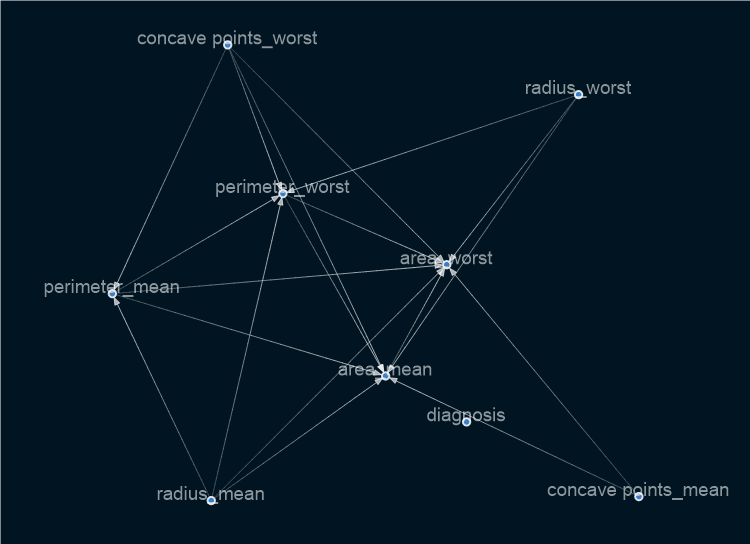

In [20]:
vis_sm(sm)

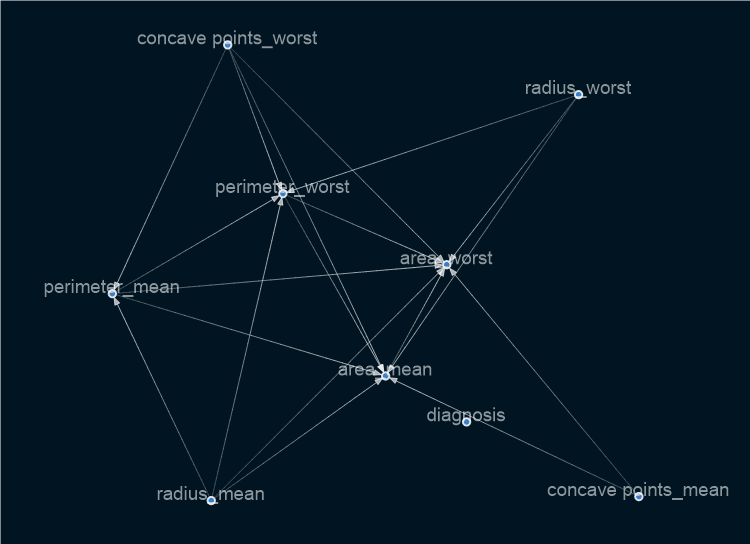

In [21]:
sm.remove_edges_below_threshold(0.8)
vis_sm(sm)


In [22]:
# 50%
x_selected = x.iloc[:, :10]
portion = int(x_selected.shape[0] *.5)
x_portion = x_selected.head(portion)

CPU times: total: 5min 59s
Wall time: 3min 12s


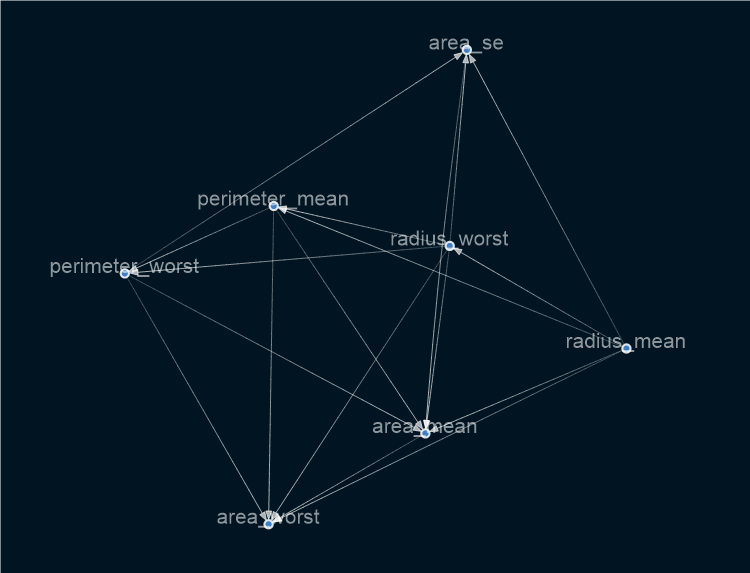

In [23]:
%%time
sm1 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm1 = sm1.get_largest_subgraph()
vis_sm(sm1)


In [24]:
# 60 %
portion = int(x_selected.shape[0]*.6)
x_portion = x_selected.head(portion)


CPU times: total: 5min 48s
Wall time: 3min 5s


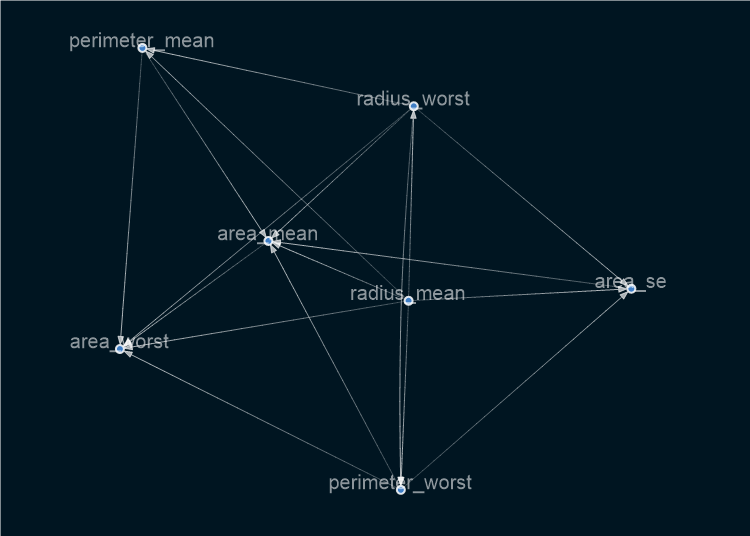

In [25]:
%%time
sm2 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm2 = sm2.get_largest_subgraph()
vis_sm(sm2)


In [26]:
# 70%
portion = int(x_selected.shape[0]*.7)
x_portion = x_selected.head(portion)

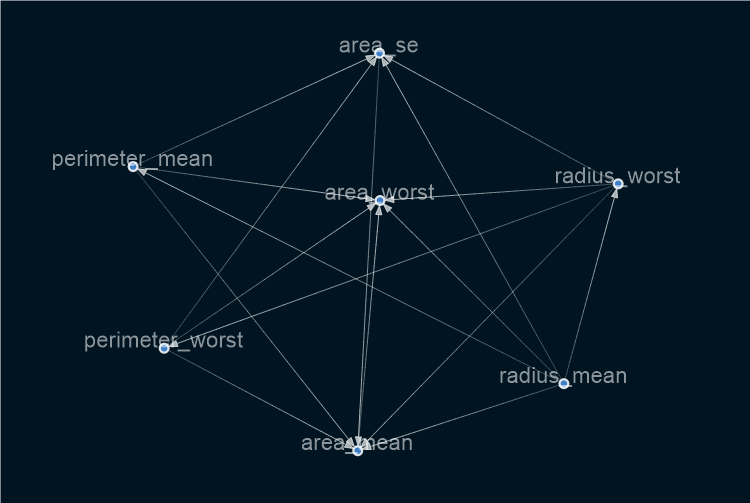

In [27]:
sm3 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm3 = sm3.get_largest_subgraph()
vis_sm(sm3)

In [28]:
# 80%
portion = int(x_selected.shape[0]*.8)
x_portion = x_selected.head(portion)

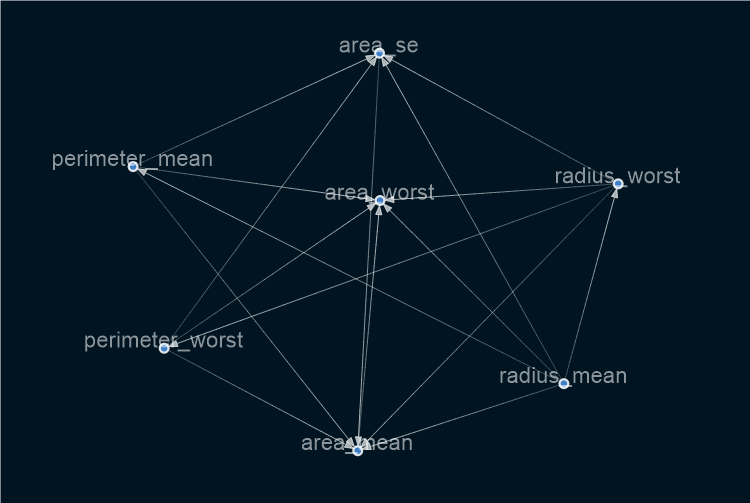

In [29]:
sm4 = from_pandas_lasso(x_portion,
                       tabu_parent_nodes=['diagnosis'],
                       w_threshold=0.3,
                       beta=0.8)
sm4 = sm4.get_largest_subgraph()
vis_sm(sm4)

In [30]:
a = np.array(sm1.edges)
b = np.array(sm2.edges)

In [54]:
c=a.flatten()
d=b.flatten()

In [56]:
print(c.shape)
d

(36,)


array(['perimeter_worst', 'area_worst', 'perimeter_worst', 'area_mean',
       'perimeter_worst', 'area_se', 'radius_worst', 'perimeter_worst',
       'radius_worst', 'area_worst', 'radius_worst', 'perimeter_mean',
       'radius_worst', 'area_mean', 'radius_worst', 'area_se',
       'perimeter_mean', 'area_worst', 'perimeter_mean', 'area_mean',
       'area_mean', 'area_worst', 'radius_mean', 'perimeter_worst',
       'radius_mean', 'area_worst', 'radius_mean', 'radius_worst',
       'radius_mean', 'perimeter_mean', 'radius_mean', 'area_mean',
       'radius_mean', 'area_se', 'area_se', 'area_mean'], dtype='<U15')

In [37]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import jaccard_score

In [65]:
jaccard_score(c,d, average=None)

array([0.5       , 1.        , 0.42857143, 0.8       , 0.66666667,
       0.83333333, 1.        ])

In [41]:
# final graph
%%time
sm = from_pandas_lasso( x_selected,
                        tabu_parent_nodes=['diagnosis'], 
                        w_threshold=0.3, 
                        beta=0.8)

UsageError: Line magic function `%%time` not found.


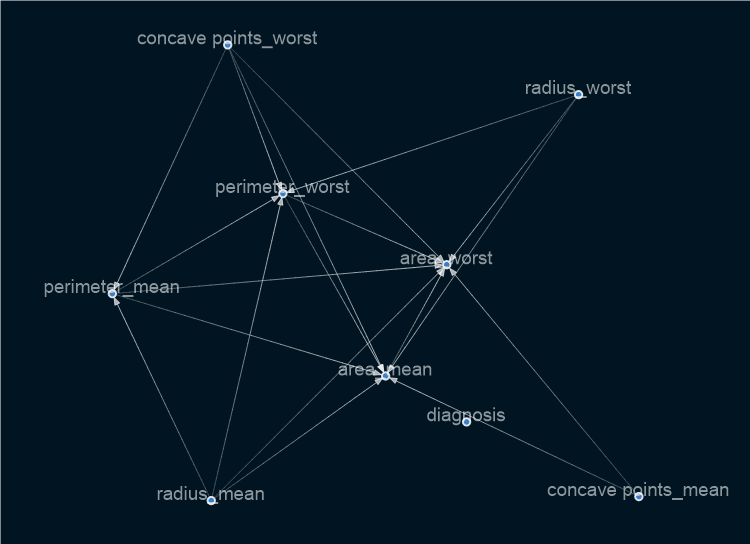

In [42]:
vis_sm(sm)

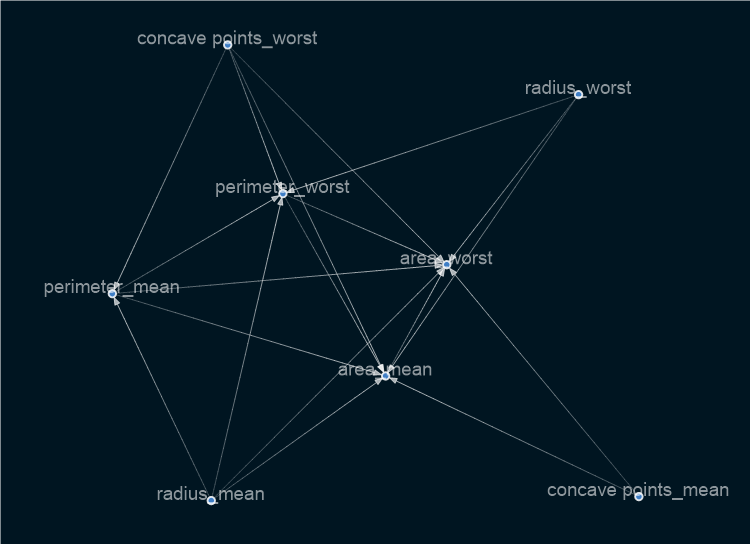

In [43]:
sm = sm.get_largest_subgraph()
vis_sm(sm)

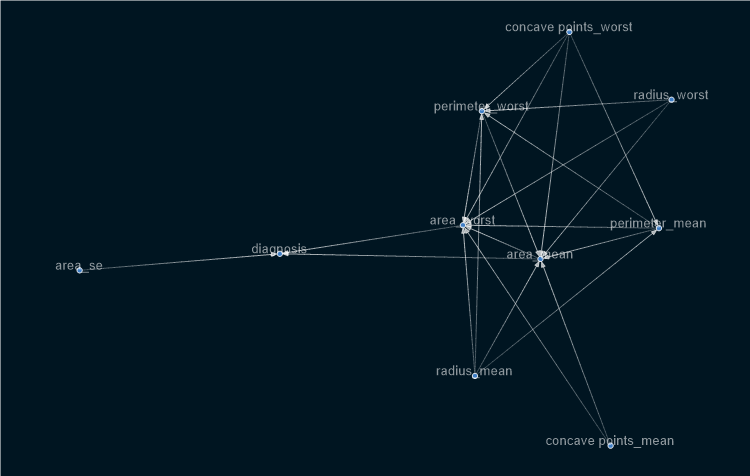

In [ ]:
sm.add_edge("area_mean", "diagnosis")
sm.add_edge("area_se", "diagnosis")
sm.add_edge("area_worst", "diagnosis")
vis_sm(sm)

In [44]:
bn = BayesianNetwork(sm)
blanket = get_markov_blanket(bn, 'diagnosis')
edge_list = list(blanket.structure.edges)
edge_list
vis_sm(blanket.structure)

KeyError: 'diagnosis is not found in the network'